In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cold_source_control_dataset.csv')

**Data cleaning and pre-processing**

In [3]:
df.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4


In [4]:
df.shape

(3498, 12)

In [5]:
df.describe()

,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Output
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,65.210630,21.525187,26.492562,23.985334,0.761498,65.184674,48.002691,0.087430,2.305269,2.016009
std,19.357733,2.185514,2.922662,2.863748,0.159458,19.619440,6.402203,0.024231,1.698664,1.422792
min,10.000000,15.000000,16.282475,18.000000,0.330000,20.000000,31.092931,0.030000,0.000000,0.000000
25%,51.567063,19.999580,24.500078,21.979872,0.650000,50.937388,43.518808,0.070000,0.950000,1.000000
50%,65.639304,21.524394,26.495368,23.976287,0.760000,65.464146,48.049176,0.090000,1.960000,2.000000
75%,79.528495,23.085253,28.456507,25.918209,0.880000,80.109679,52.339698,0.100000,3.310000,3.000000
max,100.000000,27.965248,35.775612,34.375385,1.110000,100.000000,70.521581,0.160000,10.380000,4.000000


In [6]:
cols = df.columns
print(cols)
print(len(cols))

Index(['Timestamp', 'Server_Workload(%)', 'Inlet_Temperature(°C)',
       'Outlet_Temperature(°C)', 'Ambient_Temperature(°C)',
       'Cooling_Unit_Power_Consumption(kW)', 'Chiller_Usage(%)',
       'AHU_Usage(%)', 'Total_Energy_Cost($)', 'Temperature_Deviation(°C)',
       'Cooling_Strategy_Action', 'Output'],
      dtype='object')
12


In [7]:
print(len(cols))
print(len(cols))
num_cols = df._get_numeric_data().columns
print(num_cols)
print(len(num_cols))

12
12
Index(['Server_Workload(%)', 'Inlet_Temperature(°C)', 'Outlet_Temperature(°C)',
       'Ambient_Temperature(°C)', 'Cooling_Unit_Power_Consumption(kW)',
       'Chiller_Usage(%)', 'AHU_Usage(%)', 'Total_Energy_Cost($)',
       'Temperature_Deviation(°C)', 'Output'],
      dtype='object')
10


In [8]:
non_num_cols = set(cols) - set(num_cols)
print(non_num_cols)

{'Cooling_Strategy_Action', 'Timestamp'}


In [9]:
cols_type = df.dtypes
print(cols_type)

Timestamp                              object
Server_Workload(%)                    float64
Inlet_Temperature(°C)                 float64
Outlet_Temperature(°C)                float64
Ambient_Temperature(°C)               float64
Cooling_Unit_Power_Consumption(kW)    float64
Chiller_Usage(%)                      float64
AHU_Usage(%)                          float64
Total_Energy_Cost($)                  float64
Temperature_Deviation(°C)             float64
Cooling_Strategy_Action                object
Output                                  int64
dtype: object


In [10]:
df.info

<bound method DataFrame.info of                 Timestamp  Server_Workload(%)  Inlet_Temperature(°C)  \
0     2025-01-01 00:00:00          100.000000              24.726323   
1     2025-01-01 01:00:00           87.358993              23.085262   
2     2025-01-01 02:00:00           19.313800              16.288791   
3     2025-01-01 03:00:00           41.406680              19.217280   
4     2025-01-01 04:00:00           49.514889              19.991740   
...                   ...                 ...                    ...   
3493  2025-05-26 13:00:00           66.295603              22.909311   
3494  2025-05-26 14:00:00           74.390242              21.284547   
3495  2025-05-26 15:00:00           80.768533              22.457125   
3496  2025-05-26 16:00:00           74.088522              21.278572   
3497  2025-05-26 17:00:00           27.628318              17.750417   

      Outlet_Temperature(°C)  Ambient_Temperature(°C)  \
0                  28.469324                21

In [11]:
df.isnull().sum()

Timestamp                             0
Server_Workload(%)                    0
Inlet_Temperature(°C)                 0
Outlet_Temperature(°C)                0
Ambient_Temperature(°C)               0
Cooling_Unit_Power_Consumption(kW)    0
Chiller_Usage(%)                      0
AHU_Usage(%)                          0
Total_Energy_Cost($)                  0
Temperature_Deviation(°C)             0
Cooling_Strategy_Action               0
Output                                0
dtype: int64

In [12]:
num_cols_df = df._get_numeric_data()
median_values = num_cols_df.median(numeric_only=True)
print(median_values)

Server_Workload(%)                    65.639304
Inlet_Temperature(°C)                 21.524394
Outlet_Temperature(°C)                26.495368
Ambient_Temperature(°C)               23.976287
Cooling_Unit_Power_Consumption(kW)     0.760000
Chiller_Usage(%)                      65.464146
AHU_Usage(%)                          48.049176
Total_Energy_Cost($)                   0.090000
Temperature_Deviation(°C)              1.960000
Output                                 2.000000
dtype: float64


In [13]:
mean_values = num_cols_df.mean(numeric_only=True)
print(mean_values)

Server_Workload(%)                    65.210630
Inlet_Temperature(°C)                 21.525187
Outlet_Temperature(°C)                26.492562
Ambient_Temperature(°C)               23.985334
Cooling_Unit_Power_Consumption(kW)     0.761498
Chiller_Usage(%)                      65.184674
AHU_Usage(%)                          48.002691
Total_Energy_Cost($)                   0.087430
Temperature_Deviation(°C)              2.305269
Output                                 2.016009
dtype: float64


In [14]:
standard_div_values = num_cols_df.std(numeric_only=True)
print(standard_div_values)

Server_Workload(%)                    19.357733
Inlet_Temperature(°C)                  2.185514
Outlet_Temperature(°C)                 2.922662
Ambient_Temperature(°C)                2.863748
Cooling_Unit_Power_Consumption(kW)     0.159458
Chiller_Usage(%)                      19.619440
AHU_Usage(%)                           6.402203
Total_Energy_Cost($)                   0.024231
Temperature_Deviation(°C)              1.698664
Output                                 1.422792
dtype: float64


In [15]:
corr = num_cols_df.corr()
corr

,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Output
Server_Workload(%),1.000000,0.884864,0.646842,-0.035108,0.935136,0.956171,-0.029674,0.700178,0.003274,-0.017488
Inlet_Temperature(°C),0.884864,1.000000,0.733550,-0.025846,0.829043,0.847400,-0.024958,0.621228,-0.000339,-0.018975
Outlet_Temperature(°C),0.646842,0.733550,1.000000,-0.025262,0.603391,0.619895,-0.033732,0.459915,0.010517,-0.013820
Ambient_Temperature(°C),-0.035108,-0.025846,-0.025262,1.000000,0.149370,-0.030822,0.893500,0.115075,0.032253,-0.002731
Cooling_Unit_Power_Consumption(kW),0.935136,0.829043,0.603391,0.149370,1.000000,0.979438,0.178283,0.750704,0.007107,-0.018218
Chiller_Usage(%),0.956171,0.847400,0.619895,-0.030822,0.979438,1.000000,-0.023080,0.735410,0.002627,-0.016643
AHU_Usage(%),-0.029674,-0.024958,-0.033732,0.893500,0.178283,-0.023080,1.000000,0.133571,0.021255,-0.009582
Total_Energy_Cost($),0.700178,0.621228,0.459915,0.115075,0.750704,0.735410,0.133571,1.000000,0.019551,-0.000797
Temperature_Deviation(°C),0.003274,-0.000339,0.010517,0.032253,0.007107,0.002627,0.021255,0.019551,1.000000,-0.023042
Output,-0.017488,-0.018975,-0.013820,-0.002731,-0.018218,-0.016643,-0.009582,-0.000797,-0.023042,1.000000


In [16]:
target = [col for col in corr.columns if 'Cooling_Unit_Power_Consumption(kW)' in col]

if target:
    seed_corr = corr[target[0]].sort_values(ascending=False)
    print(seed_corr)
else:
    print("Cooling_Unit_Power_Consumption(kW) column not found.")

Cooling_Unit_Power_Consumption(kW)    1.000000
Chiller_Usage(%)                      0.979438
Server_Workload(%)                    0.935136
Inlet_Temperature(°C)                 0.829043
Total_Energy_Cost($)                  0.750704
Outlet_Temperature(°C)                0.603391
AHU_Usage(%)                          0.178283
Ambient_Temperature(°C)               0.149370
Temperature_Deviation(°C)             0.007107
Output                               -0.018218
Name: Cooling_Unit_Power_Consumption(kW), dtype: float64


In [17]:
df.nunique()

Timestamp                             3498
Server_Workload(%)                    3346
Inlet_Temperature(°C)                 3497
Outlet_Temperature(°C)                3498
Ambient_Temperature(°C)               3424
Cooling_Unit_Power_Consumption(kW)      79
Chiller_Usage(%)                      3307
AHU_Usage(%)                          3498
Total_Energy_Cost($)                    14
Temperature_Deviation(°C)              624
Cooling_Strategy_Action                  5
Output                                   5
dtype: int64

In [18]:
counts = df.nunique()
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100)<1]
print(to_del)

[8, 10, 11]


In [19]:
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [Timestamp, Server_Workload(%), Inlet_Temperature(°C), Outlet_Temperature(°C), Ambient_Temperature(°C), Cooling_Unit_Power_Consumption(kW), Chiller_Usage(%), AHU_Usage(%), Total_Energy_Cost($), Temperature_Deviation(°C), Cooling_Strategy_Action, Output]
Index: []


In [20]:
num_df = df._get_numeric_data()

In [21]:
corr = num_df.corr()

Text(0.5, 1.0, 'Data Center Heat Map')

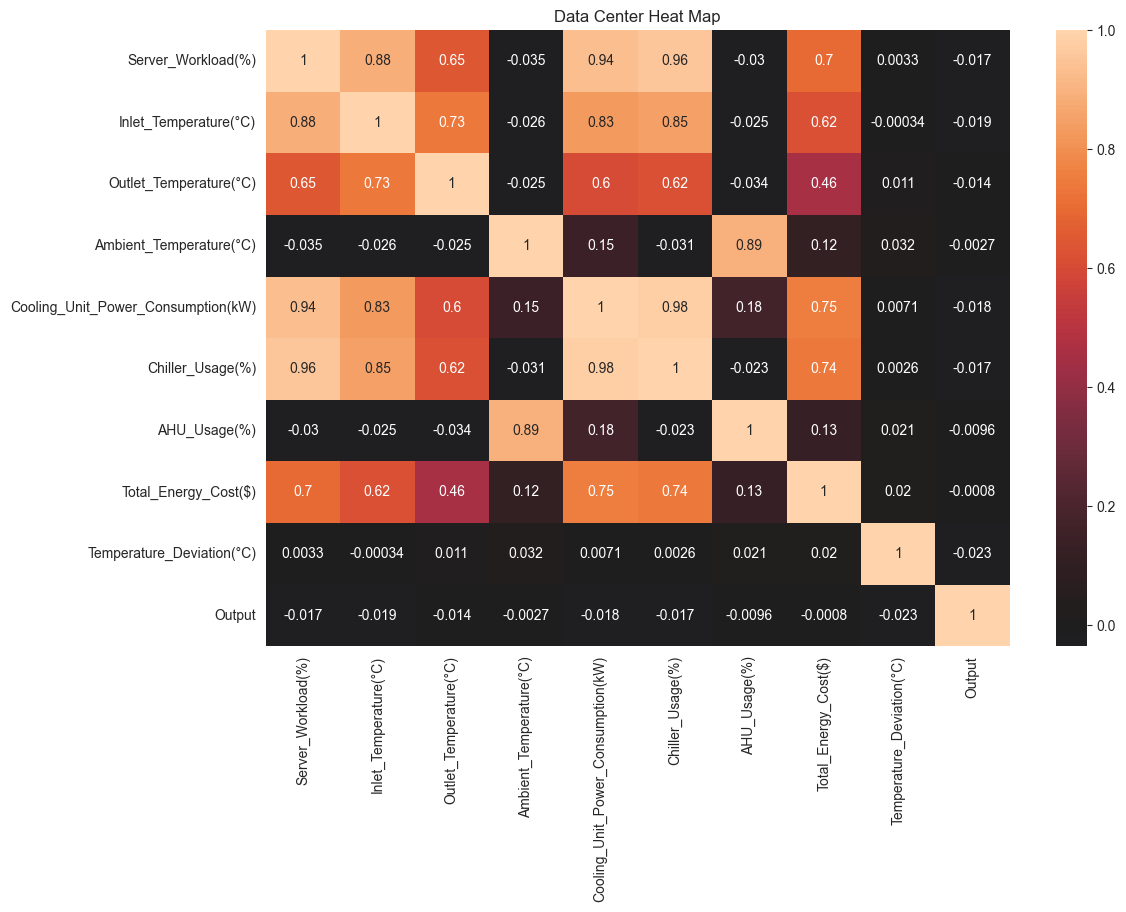

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, center=0.0)
plt.title("Data Center Heat Map")

In [23]:
invalid_workload = ((df["Server_Workload(%)"] < 0) | (df["Server_Workload(%)"] > 100)).sum()
print(invalid_workload)

0


In [24]:
invalid_cooling = (df["Cooling_Unit_Power_Consumption(kW)"] <= 0).sum()
print(invalid_cooling)

0


In [25]:
invalid_Chiller_Usage = ((df["Chiller_Usage(%)"] < 0) | (df["Chiller_Usage(%)"] > 100)).sum()
print(invalid_Chiller_Usage)

0


In [26]:
invalid_Chiller_Usage = ((df["Chiller_Usage(%)"] < 0) | (df["Chiller_Usage(%)"] > 100)).sum()
print(invalid_Chiller_Usage)

0


In [27]:
invalid_AHU_Usage = ((df["AHU_Usage(%)"] < 0) | (df["AHU_Usage(%)"] > 100)).sum()
print(invalid_AHU_Usage)

0


In [28]:
invalid_Total_Energy_Cost = (df["Total_Energy_Cost($)"] <= 0).sum()
print(invalid_Total_Energy_Cost)

0


In [29]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
time_diffs = df['Timestamp'].diff().value_counts()
print(time_diffs)

Timestamp
0 days 01:00:00    3497
Name: count, dtype: int64


Text(0.5, 1.0, "Look for 'Ghost' zeros or extreme spikes")

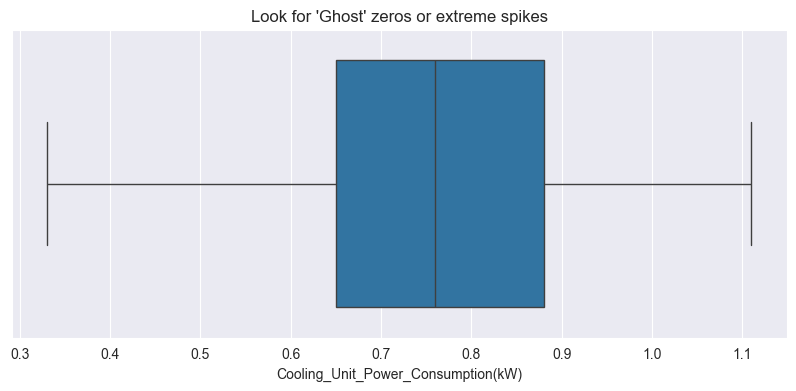

In [30]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Cooling_Unit_Power_Consumption(kW)'])
plt.title("Look for 'Ghost' zeros or extreme spikes")

In [31]:
physics_errors_1= (df['Outlet_Temperature(°C)'] < df['Inlet_Temperature(°C)']).sum()
print(f"outlet lees: {physics_errors_1}")
physics_errors_2= (df['Outlet_Temperature(°C)'] == df['Inlet_Temperature(°C)']).sum()
print(f"outlet equal: {physics_errors_2}")

outlet lees: 0
outlet equal: 21


In [32]:
physics_errors_2 = df[df['Outlet_Temperature(°C)'] == df['Inlet_Temperature(°C)']]

In [33]:
print("Audit of 21 Equal Temperature Rows:")
print(physics_errors_2[['Server_Workload(%)', 'Cooling_Unit_Power_Consumption(kW)']].describe())

Audit of 21 Equal Temperature Rows:
       Server_Workload(%)  Cooling_Unit_Power_Consumption(kW)
count           21.000000                           21.000000
mean            70.009839                            0.820952
std             16.169896                            0.136011
min             42.877547                            0.510000
25%             58.692886                            0.730000
50%             73.436654                            0.860000
75%             79.793489                            0.940000
max             92.869026                            0.970000


In [34]:
high_load_errors = (physics_errors_2['Server_Workload(%)'] > 10).sum()
print(f"\nRows with >10% Workload but ZERO heat increase: {high_load_errors}")


Rows with >10% Workload but ZERO heat increase: 21


In [35]:
df.shape

(3498, 12)

In [36]:
print(21/3498)

0.006003430531732418


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Reduce AHU'),
  Text(1, 0, 'Eco Mode'),
  Text(2, 0, 'Boost All'),
  Text(3, 0, 'Maintain'),
  Text(4, 0, 'Increase Chiller')])

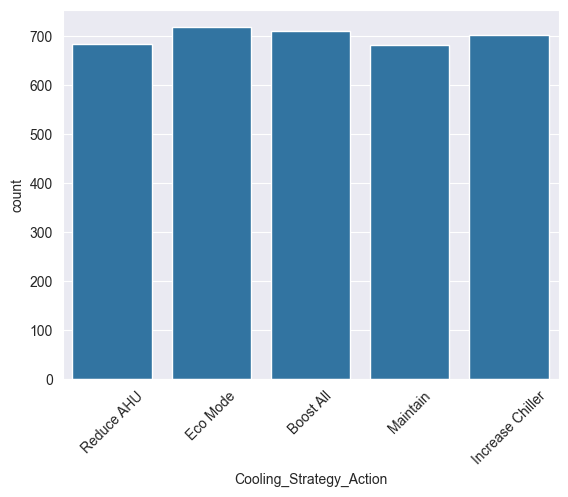

In [37]:
sns.countplot(data=df, x='Cooling_Strategy_Action')
plt.xticks(rotation=45)

<Axes: xlabel='Cooling_Unit_Power_Consumption(kW)', ylabel='Count'>

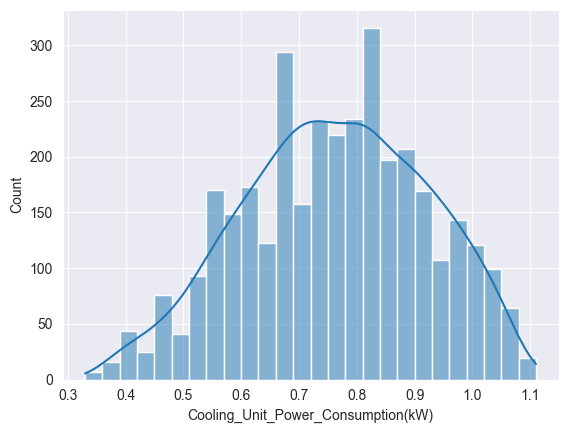

In [38]:
sns.histplot(df['Cooling_Unit_Power_Consumption(kW)'], kde=True)

In [39]:
df_cleaned = df[df['Outlet_Temperature(°C)'] > df['Inlet_Temperature(°C)']].copy()

In [40]:
print(f"Original rows: {len(df)}")

Original rows: 3498


In [41]:
print(f"Cleaned rows: {len(df_cleaned)}")

Cleaned rows: 3477


In [42]:
print(f"Rows removed: {len(df) - len(df_cleaned)}")

Rows removed: 21


In [43]:
df_cleaned.shape

(3477, 12)

In [44]:
df_cleaned.to_csv('cleaned_cold_source_control_dataset.csv', index=False)

In [45]:
df_new = pd.read_csv("cleaned_cold_source_control_dataset.csv")


In [46]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4


In [47]:
df_new.shape

(3477, 12)

**Feature engineering**

In [48]:
it_power_max = 5
df_new["IT_Power_Consumption(kW)"] = (df_new["Server_Workload(%)"]/100) * it_power_max

In [49]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output,IT_Power_Consumption(kW)
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1,5.000000
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4,4.367950
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4,0.965690
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3,2.070334
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4,2.475744


In [50]:
df_new["PUE"] = ((df_new["IT_Power_Consumption(kW)"]+df_new["Cooling_Unit_Power_Consumption(kW)"])/df_new["IT_Power_Consumption(kW)"]).round(2)

In [51]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output,IT_Power_Consumption(kW),PUE
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1,5.000000,1.20
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4,4.367950,1.22
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4,0.965690,1.45
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3,2.070334,1.29
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4,2.475744,1.28


In [52]:
df_new["IT_Power_Cost"] = df_new["IT_Power_Consumption(kW)"]*df_new["Total_Energy_Cost($)"]

In [53]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output,IT_Power_Consumption(kW),PUE,IT_Power_Cost
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1,5.000000,1.20,0.450000
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4,4.367950,1.22,0.436795
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4,0.965690,1.45,0.057941
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3,2.070334,1.29,0.165627
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4,2.475744,1.28,0.247574


In [54]:
df_new["Total_cost"] = (df_new["IT_Power_Consumption(kW)"]+df_new["Cooling_Unit_Power_Consumption(kW)"])*df_new["Total_Energy_Cost($)"]

In [55]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output,IT_Power_Consumption(kW),PUE,IT_Power_Cost,Total_cost
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1,5.000000,1.20,0.450000,0.538200
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4,4.367950,1.22,0.436795,0.531795
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4,0.965690,1.45,0.057941,0.083741
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3,2.070334,1.29,0.165627,0.214427
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4,2.475744,1.28,0.247574,0.316574


In [56]:
df_new["Added_Cooling_Cost"] = df_new["Total_cost"] - df_new["IT_Power_Cost"]

In [57]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output,IT_Power_Consumption(kW),PUE,IT_Power_Cost,Total_cost,Added_Cooling_Cost
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1,5.000000,1.20,0.450000,0.538200,0.0882
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4,4.367950,1.22,0.436795,0.531795,0.0950
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4,0.965690,1.45,0.057941,0.083741,0.0258
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3,2.070334,1.29,0.165627,0.214427,0.0488
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4,2.475744,1.28,0.247574,0.316574,0.0690


In [58]:
strategy_price_map = df_new.groupby('Cooling_Strategy_Action')['Total_Energy_Cost($)'].mean().to_dict()
strategy_risk_map = df_new.groupby('Cooling_Strategy_Action')['Total_Energy_Cost($)'].std().to_dict()

In [59]:
print("Strategy-Based Financial Context (Mean):")
for strategy, price in strategy_price_map.items():
    risk = strategy_risk_map[strategy]
    print(f"- {strategy}: ${price:.4f}/kWh (Risk/Volatility: ±${risk:.4f})")

Strategy-Based Financial Context (Mean):
- Boost All: $0.0855/kWh (Risk/Volatility: ±$0.0241)
- Eco Mode: $0.0890/kWh (Risk/Volatility: ±$0.0248)
- Increase Chiller: $0.0880/kWh (Risk/Volatility: ±$0.0237)
- Maintain: $0.0871/kWh (Risk/Volatility: ±$0.0244)
- Reduce AHU: $0.0875/kWh (Risk/Volatility: ±$0.0241)


In [60]:
df_new["DT"] = df_new['Outlet_Temperature(°C)']-df_new['Inlet_Temperature(°C)']

In [61]:
df_new.head()

,Timestamp,Server_Workload(%),Inlet_Temperature(°C),Outlet_Temperature(°C),Ambient_Temperature(°C),Cooling_Unit_Power_Consumption(kW),Chiller_Usage(%),AHU_Usage(%),Total_Energy_Cost($),Temperature_Deviation(°C),Cooling_Strategy_Action,Output,IT_Power_Consumption(kW),PUE,IT_Power_Cost,Total_cost,Added_Cooling_Cost,DT
0,2025-01-01 00:00:00,100.000000,24.726323,28.469324,21.424454,0.98,94.205859,45.462911,0.09,2.58,Reduce AHU,1,5.000000,1.20,0.450000,0.538200,0.0882,3.743001
1,2025-01-01 01:00:00,87.358993,23.085262,29.854364,26.420271,0.95,85.776996,53.185858,0.10,2.42,Eco Mode,4,4.367950,1.22,0.436795,0.531795,0.0950,6.769102
2,2025-01-01 02:00:00,19.313800,16.288791,23.381846,21.452172,0.43,28.148672,40.833469,0.06,2.55,Eco Mode,4,0.965690,1.45,0.057941,0.083741,0.0258,7.093055
3,2025-01-01 03:00:00,41.406680,19.217280,24.323699,19.200412,0.61,49.300227,42.490922,0.08,4.80,Boost All,3,2.070334,1.29,0.165627,0.214427,0.0488,5.106418
4,2025-01-01 04:00:00,49.514889,19.991740,23.205543,26.768503,0.69,49.656127,58.100890,0.10,2.77,Eco Mode,4,2.475744,1.28,0.247574,0.316574,0.0690,3.213803


In [62]:
df_new['DT'].describe()

count    3477.000000
mean        4.997376
std         1.954781
min         0.002374
25%         3.650305
50%         4.971318
75%         6.326500
max        11.673549
Name: DT, dtype: float64

Text(0.5, 1.0, 'Data Center Heat Map')

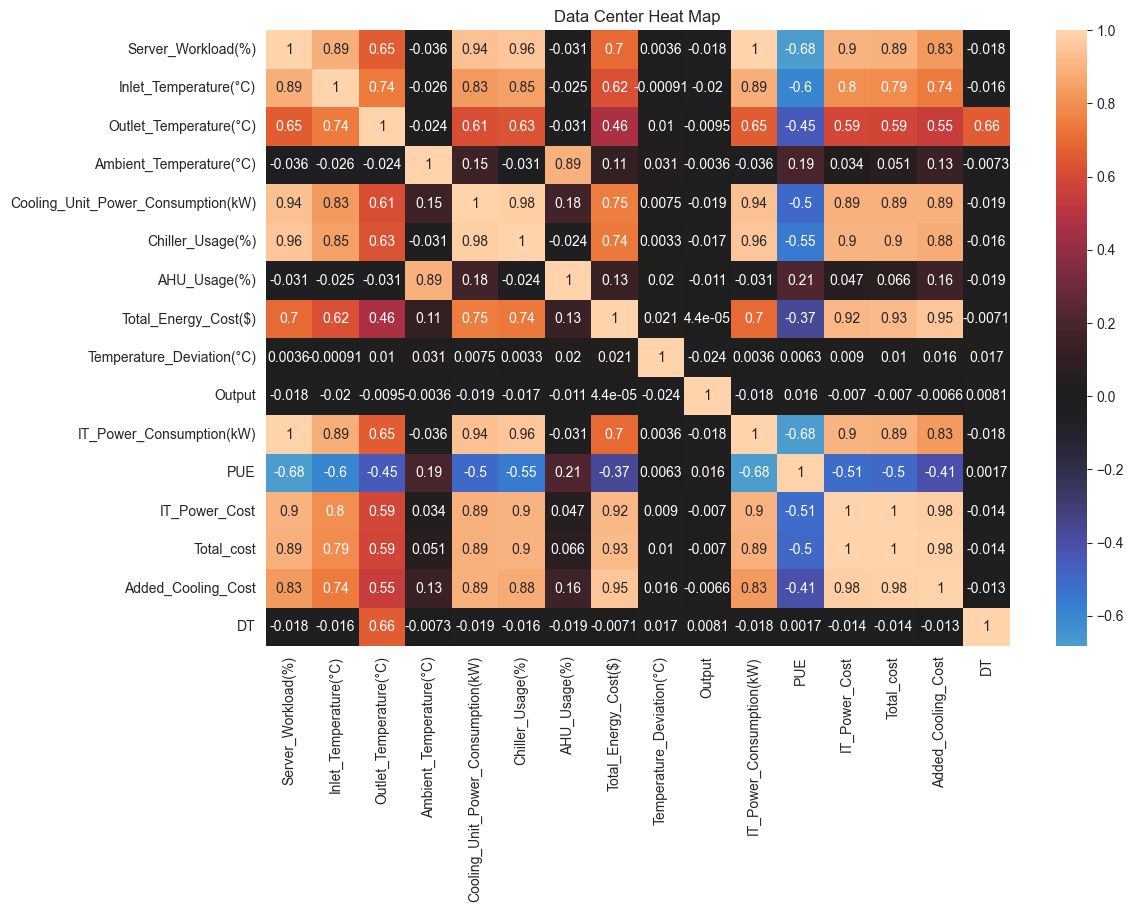

In [63]:
num_df = df_new._get_numeric_data()
corr = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, center=0.0)
plt.title("Data Center Heat Map")

In [64]:
df_new.select_dtypes(include=["number"]).corr()["DT"].sort_values(ascending=False)

DT                                    1.000000
Outlet_Temperature(°C)                0.659622
Temperature_Deviation(°C)             0.016634
Output                                0.008136
PUE                                   0.001658
Total_Energy_Cost($)                 -0.007142
Ambient_Temperature(°C)              -0.007312
Added_Cooling_Cost                   -0.012575
Total_cost                           -0.014015
IT_Power_Cost                        -0.014253
Chiller_Usage(%)                     -0.015681
Inlet_Temperature(°C)                -0.016366
IT_Power_Consumption(kW)             -0.018484
Server_Workload(%)                   -0.018484
AHU_Usage(%)                         -0.018677
Cooling_Unit_Power_Consumption(kW)   -0.019129
Name: DT, dtype: float64

In [65]:
df_new.select_dtypes(include=["number"]).corr()["Temperature_Deviation(°C)"].sort_values(ascending=False)

Temperature_Deviation(°C)             1.000000
Ambient_Temperature(°C)               0.031464
Total_Energy_Cost($)                  0.020924
AHU_Usage(%)                          0.020341
DT                                    0.016634
Added_Cooling_Cost                    0.016131
Outlet_Temperature(°C)                0.010495
Total_cost                            0.010238
IT_Power_Cost                         0.009014
Cooling_Unit_Power_Consumption(kW)    0.007542
PUE                                   0.006311
Server_Workload(%)                    0.003631
IT_Power_Consumption(kW)              0.003631
Chiller_Usage(%)                      0.003266
Inlet_Temperature(°C)                -0.000907
Output                               -0.024373
Name: Temperature_Deviation(°C), dtype: float64

In [66]:
df_new.select_dtypes(include=["number"]).corr()["Outlet_Temperature(°C)"].sort_values(ascending=False)


Outlet_Temperature(°C)                1.000000
Inlet_Temperature(°C)                 0.740701
DT                                    0.659622
Server_Workload(%)                    0.652940
IT_Power_Consumption(kW)              0.652940
Chiller_Usage(%)                      0.626663
Cooling_Unit_Power_Consumption(kW)    0.610683
IT_Power_Cost                         0.590986
Total_cost                            0.585560
Added_Cooling_Cost                    0.547826
Total_Energy_Cost($)                  0.462740
Temperature_Deviation(°C)             0.010495
Output                               -0.009542
Ambient_Temperature(°C)              -0.024194
AHU_Usage(%)                         -0.031267
PUE                                  -0.448091
Name: Outlet_Temperature(°C), dtype: float64

**Model Training and selection**

In [67]:
from sklearn.model_selection import train_test_split

features = ["Cooling_Strategy_Action", "Server_Workload(%)", "Inlet_Temperature(°C)","Ambient_Temperature(°C)"]

df_model = df_new.dropna(subset=['Cooling_Unit_Power_Consumption(kW)','DT'])
x = df_model[features]

yc = df_model["Cooling_Unit_Power_Consumption(kW)"]
ydt = df_model["Outlet_Temperature(°C)"]

x_train, x_test, yc_train, yc_test, ydt_train, ydt_test = train_test_split(x, yc, ydt, test_size=0.2, random_state=42)


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, mean_squared_error

cat_cols = ['Cooling_Strategy_Action']

num_cols = ['Server_Workload(%)','Inlet_Temperature(°C)','Ambient_Temperature(°C)']

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ("num", StandardScaler(),num_cols)
    ]
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorring = {
    "rmse": make_scorer(rmse),
    "mae": 'neg_mean_absolute_error',
    "r2": 'r2'
}

In [69]:
from sklearn.linear_model import Ridge
ridge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", Ridge())
])

ridge_model_c = cross_validate(
    ridge_pipe,
    x_train,
    yc_train,
    cv=cv,
    scoring=scorring,
    return_train_score=True
)

print("\nRidge Model for cooling:")
print("Train RMSE:", ridge_model_c["train_rmse"].mean())
print("Val RMSE:", ridge_model_c["test_rmse"].mean())
print("val_RMSE per fold", ridge_model_c["test_rmse"])
train_rmse = ridge_model_c["train_rmse"].mean()
val_rmse = ridge_model_c["test_rmse"].mean()
gap = val_rmse - train_rmse
print("Val RMSE std:", ridge_model_c["test_rmse"].std())
print("Val MAE:", -ridge_model_c["test_mae"].mean())
print("Val R2:", ridge_model_c["test_r2"].mean())

ridge_model_DT = cross_validate(
    ridge_pipe,
    x_train,
    ydt_train,
    cv=cv,
    scoring=scorring,
    return_train_score=True
)

print("\nRidge Model for outlet temperature:")
print("Train RMSE:", ridge_model_DT["train_rmse"].mean())
print("Val RMSE:", ridge_model_DT["test_rmse"].mean())
print("val_RMSE per fold", ridge_model_DT["test_rmse"])
train_rmse = ridge_model_DT["train_rmse"].mean()
val_rmse = ridge_model_DT["test_rmse"].mean()
gap = val_rmse - train_rmse
print("Val RMSE std:", ridge_model_DT["test_rmse"].std())
print("Val MAE:", -ridge_model_DT["test_mae"].mean())
print("Val R2:", ridge_model_DT["test_r2"].mean())


Ridge Model for cooling:
Train RMSE: 0.04844879990850955
Val RMSE: 0.048594059957448824
val_RMSE per fold [0.04920982 0.04820269 0.04929833 0.04879994 0.04745952]
Val RMSE std: 0.0006867144986395511
Val MAE: 0.04143868520169887
Val R2: 0.9075563780951464

Ridge Model for outlet temperature:
Train RMSE: 1.9506461273300466
Val RMSE: 1.9590722247215475
val_RMSE per fold [1.92657806 1.90818853 2.00115104 2.01565509 1.94378841]
Val RMSE std: 0.042073420998113384
Val MAE: 1.5829852025057483
Val R2: 0.5409220849611689


/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_

In [70]:
from sklearn.linear_model import BayesianRidge
BayesianRidge_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", BayesianRidge())
])

BayesianRidge_model_c = cross_validate(
    BayesianRidge_pipe,
    x_train,
    yc_train,
    cv=cv,
    scoring=scorring,
    return_train_score=True
)

print("\nBayesian Ridge Model for cooling:")
print("Train RMSE:", BayesianRidge_model_c["train_rmse"].mean())
print("Val RMSE:", BayesianRidge_model_c["test_rmse"].mean())
print("val_RMSE per fold", BayesianRidge_model_c["test_rmse"])
train_rmse = BayesianRidge_model_c["train_rmse"].mean()
val_rmse = BayesianRidge_model_c["test_rmse"].mean()
gap = val_rmse - train_rmse
print("Val RMSE std:", BayesianRidge_model_c["test_rmse"].std())
print("Val MAE:", -BayesianRidge_model_c["test_mae"].mean())
print("Val R2:", BayesianRidge_model_c["test_r2"].mean())

BayesianRidge_model_DT = cross_validate(
    BayesianRidge_pipe,
    x_train,
    ydt_train,
    cv=cv,
    scoring=scorring,
    return_train_score=True
)

print("\nBayesianRidge Model for outlet temperature:")
print("Train RMSE:", BayesianRidge_model_DT["train_rmse"].mean())
print("Val RMSE:", BayesianRidge_model_DT["test_rmse"].mean())
print("val_RMSE per fold", BayesianRidge_model_DT["test_rmse"])
train_rmse = BayesianRidge_model_DT["train_rmse"].mean()
val_rmse = BayesianRidge_model_DT["test_rmse"].mean()
gap = val_rmse - train_rmse
print("Val RMSE std:", BayesianRidge_model_DT["test_rmse"].std())
print("Val MAE:", -BayesianRidge_model_DT["test_mae"].mean())
print("Val R2:", BayesianRidge_model_DT["test_r2"].mean())



Bayesian Ridge Model for cooling:
Train RMSE: 0.04844869557262331
Val RMSE: 0.0485940510369247
val_RMSE per fold [0.04920977 0.04820243 0.04930088 0.0488001  0.04745708]
Val RMSE std: 0.000688075220529657
Val MAE: 0.04143816284186154
Val R2: 0.9075561736503716

BayesianRidge Model for outlet temperature:
Train RMSE: 1.950681599072849
Val RMSE: 1.9590830154418968
val_RMSE per fold [1.92727071 1.90770624 2.00134362 2.01530661 1.94378789]
Val RMSE std: 0.04202995948863208
Val MAE: 1.5831330118047338
Val R2: 0.5409148965579204


/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelosmichalopoulos/.virtualenvs/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/angelo

In [76]:
from xgboost import XGBRegressor

XGB_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(booster='gblinear', objective='reg:squarederror', random_state=42))
])

XGB_model_c = cross_validate(
    XGB_pipe,
    x_train,
    yc_train,
    cv=cv,
    scoring=scorring,
    return_train_score=True
)

print("\nXGB Model for cooling:")
print("Train RMSE:", XGB_model_c["train_rmse"].mean())
print("Val RMSE:", XGB_model_c["test_rmse"].mean())
print("val_RMSE per fold", XGB_model_c["test_rmse"])
train_rmse = XGB_model_c["train_rmse"].mean()
val_rmse = XGB_model_c["test_rmse"].mean()
gap = val_rmse - train_rmse
print("Val RMSE std:", XGB_model_c["test_rmse"].std())
print("Val MAE:", -XGB_model_c["test_mae"].mean())
print("Val R2:", XGB_model_c["test_r2"].mean())

XGB_model_DT = cross_validate(
    XGB_pipe,
    x_train,
    ydt_train,
    cv=cv,
    scoring=scorring,
    return_train_score=True
)

print("\nXGB Model for outlet temperature:")
print("Train RMSE:", XGB_model_DT["train_rmse"].mean())
print("Val RMSE:", XGB_model_DT["test_rmse"].mean())
print("val_RMSE per fold", XGB_model_DT["test_rmse"])
train_rmse = XGB_model_DT["train_rmse"].mean()
val_rmse = XGB_model_DT["test_rmse"].mean()
gap = val_rmse - train_rmse
print("val RMSE std:", XGB_model_DT["test_rmse"].std())
print("val MAE:", -XGB_model_DT["test_mae"].mean())
print("val R2:", XGB_model_DT["test_r2"].mean())



XGB Model for cooling:
Train RMSE: 0.04844862987090807
Val RMSE: 0.04859433320358672
val_RMSE per fold [0.04921002 0.04820138 0.04930399 0.04880084 0.04745543]
Val RMSE std: 0.000689468929300174
Val MAE: 0.041438131503981665
Val R2: 0.9075547974974079

XGB Model for outlet temperature:
Train RMSE: 1.950645086796546
Val RMSE: 1.959076756324908
val_RMSE per fold [1.9265111  1.90826781 2.0011188  2.01570828 1.9437778 ]
val RMSE std: 0.04207324891969222
val MAE: 1.5829709243891017
val R2: 0.5409199975724119
